<a href="https://colab.research.google.com/github/jeonbyeongguk/Project/blob/main/%EA%B3%A0%EA%B0%9D%20%EA%B5%AC%EB%A7%A4%20%ED%8C%A8%ED%84%B4%20%EB%B6%84%EC%84%9D%EC%9D%84%20%ED%86%B5%ED%95%9C%20%EB%A6%AC%ED%85%90%EC%85%98%20%EA%B0%95%ED%99%94%20%EC%A0%84%EB%9E%B5%20%EC%A0%9C%EC%95%88/%EA%B3%A0%EA%B0%9D_%EA%B5%AC%EB%A7%A4_%ED%8C%A8%ED%84%B4_%EB%B6%84%EC%84%9D%EC%9D%84_%ED%86%B5%ED%95%9C_%EB%A6%AC%ED%85%90%EC%85%98_%EA%B0%95%ED%99%94_%EC%A0%84%EB%9E%B5_%EC%A0%9C%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 데이터 불러오기 및 데이터 정제


kaggle 데이터셋: 
'https://www.kaggle.com/datasets/latifahhukma/fashion-campus'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get update -qq
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get install -qq fonts-nanum*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.font_manager as fm

font_path = fm.findfont('NanumGothic')
print(font_path)


/usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [ ]:
import os

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

if os.path.isfile(font_path):
    print('Font file exists')
else:
    print('Font file does not exist')


Font file exists


In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 고딕 폰트 사용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
warnings.filterwarnings('ignore')


## _new와의 차이는 특정 데이터를 하나의 칼럼으로 묶는지, 아닌지의 차이가 존재
csn_url = '/content/drive/MyDrive/colab_data/Fashion Campus/click_stream_new.csv'
customer_url = '/content/drive/MyDrive/colab_data/Fashion Campus/customer.csv'
product_url = '/content/drive/MyDrive/colab_data/Fashion Campus/product.csv'
tn_url = '/content/drive/MyDrive/colab_data/Fashion Campus/transaction_new.csv'


In [ ]:
#csn = pd.read_csv(csn_url)
customer = pd.read_csv(customer_url)
product = pd.read_csv(product_url, error_bad_lines=False)
tn = pd.read_csv(tn_url)

In [ ]:
### Transaction 데이터 정제제
# click stream 데이터를 제외한 데이터를
tn = tn.query('payment_status == "Success"')
tn = tn[['created_at','customer_id','booking_id','session_id','product_id','promo_amount','payment_method','promo_code','total_amount',
         'quantity','item_price','payment_status']]
customer = customer[['customer_id','gender','birthdate','device_type','first_join_date']]
product = product[['product_id','subCategory','articleType']]
df = pd.merge(tn,customer, on='customer_id')
df = pd.merge(df,product, on = 'product_id')

#불필요한 칼럼 제거 
df.drop(columns=['payment_status'],axis= 1)

#결측치 제거 
df['promo_code'] = df['promo_code'].fillna('None')

#데이터 경량화
df[['payment_method','promo_code','gender','device_type','subCategory','articleType']]=df[['payment_method','promo_code','gender','device_type','subCategory','articleType']].astype('category')

#시계열 데이터 수정
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_year'] = df['created_at'].dt.strftime('%Y')
df['created_month'] = df['created_at'].dt.strftime('%m')
df['created_year_month'] = df['created_at'].dt.strftime('%Y-%m')
df['created_at'] = df['created_at'].dt.strftime('%Y-%m-%d')
df['first_join_date'] = pd.to_datetime(df['first_join_date']).dt.strftime('%Y-%m-%d') 
df['birthdate'] = pd.to_datetime(df['birthdate']).dt.strftime('%Y-%m-%d') 

#구매액과 아이템 가격 원화로 변환
df['total_amount'] = round(df['total_amount'] * 0.08856)
df['total_amount'] = df['total_amount'].astype(int)
df['item_price'] = round(df['item_price'] * 0.08856)
df['item_price'] = df['item_price'].astype(int)

# 데이터 정렬
df = df.sort_values(by='created_at').reset_index(drop=True)
df.head()

,created_at,customer_id,booking_id,session_id,product_id,promo_amount,payment_method,promo_code,total_amount,quantity,...,payment_status,gender,birthdate,device_type,first_join_date,subCategory,articleType,created_year,created_month,created_year_month
0,2016-06-30,74089,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,607d864b-76b5-45a1-a45d-7fb666a03ea1,33314,0,LinkAja,None,56749,3,...,Success,F,1979-07-25,iOS,2016-06-30,Topwear,Tshirts,2016,06,2016-06
1,2016-07-01,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,16061,6053,OVO,XX2022,51261,1,...,Success,M,1995-10-11,Android,2016-07-01,Bottomwear,Trousers,2016,07,2016-07
2,2016-07-01,16228,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,47650,0,Debit Card,None,29561,1,...,Success,M,1995-11-12,Android,2016-07-01,Dress,Dresses,2016,07,2016-07
3,2016-07-01,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,32185,0,Debit Card,None,22731,1,...,Success,M,1991-02-20,Android,2016-06-30,Flip Flops,Flip Flops,2016,07,2016-07
4,2016-07-01,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,7588,6053,OVO,XX2022,51261,1,...,Success,M,1995-10-11,Android,2016-07-01,Shoes,Sports Shoes,2016,07,2016-07


In [ ]:
## 고객등급 분류 기준:누적구매금액
rank = df.groupby('customer_id')['total_amount'].sum().reset_index().rename(columns={'total_amount': 'total_purchase_amount'})

# 고객 등급 지정
def customer_rank(price):
    price = round(price/10)
    if price >= 2000001:
        return 'Diamond'
    elif 1000001 <= price < 2000001:
        return 'Platinum'
    elif 500001 <= price < 1000001:
        return 'Gold'
    elif 200001 <= price < 500001:
        return 'Silver'
    elif 100001 <= price < 200001:
        return 'Bronze'
    elif 10001 <= price < 100001:
        return 'member'
    elif 2001 <= price < 10001: 
        return 'Rookie'
    else:
        return 'Newbie'

rank['customer_rank'] = rank['total_purchase_amount'].apply(customer_rank)

#df로 데이터 병합
df = pd.merge(df,rank,on='customer_id')

In [ ]:
## 구매 주기와 빈도 칼럼 생성성
data = df[['customer_id', 'created_at', 'total_amount','product_id']]

# 구매 빈도 계산
frequency_data = data.groupby('customer_id')['product_id'].count().reset_index().rename(columns={'product_id': 'Frequency'})

# Recency 계산
data['created_at'] = pd.to_datetime(data['created_at'])
snapshot_date = data['created_at'].max() + dt.timedelta(days=1)

# 고객별 최근 구매일 계산
last_purchase = data.groupby('customer_id')['created_at'].max().reset_index()

# 최근 구매일로부터 경과한 일수 계산
last_purchase['Recency'] = (snapshot_date - last_purchase['created_at']).astype('timedelta64[D]')

# Recency 데이터를 원래의 데이터셋에 병합
data = data.merge(last_purchase[['customer_id', 'Recency']], on='customer_id', how='left')

data = pd.merge(data,frequency_data, on= 'customer_id')

# 구매주기 계산 (Recency / Frequency)
data['Purchase_Cycle'] = data['Recency'] / data['Frequency']
data = data.drop(columns=['created_at','total_amount','product_id'])
data = data[['customer_id','Recency','Frequency','Purchase_Cycle']].drop_duplicates()

#df로 데이터 병합
df = pd.merge(df,data,on='customer_id')

In [ ]:
## 연도-월 및 고객 등급별 판매량량 증감율 칼럼 생성
rank_groups = df.groupby(['created_year_month', 'customer_rank'])['product_id'].count().unstack().fillna(0)

# 전월 대비 증감율 계산
product_growth_rate_rank = round((rank_groups.pct_change()) * 100,1)

# 결과 데이터프레임 초기화 및 정렬
product_count_rank = product_growth_rate_rank.stack().reset_index()
product_count_rank.columns = ['created_year_month', 'customer_rank', 'product_growth_rate_rank']
product_count_rank = product_count_rank.sort_values(['customer_rank', 'created_year_month'], ascending=True)

product_count = df.groupby(['created_year_month'])['product_id'].count()
product_count = pd.DataFrame(product_count).reset_index().sort_values(['created_year_month'], ascending=True)
product_count['product_growth_rate'] = round((product_count['product_id'].pct_change()) * 100,1)

product_count_rank = pd.merge(product_count_rank,product_count, on='created_year_month')
product_count_rank = product_count_rank[['created_year_month', 'customer_rank','product_id','product_growth_rate_rank','product_growth_rate']]
product_count_rank = product_count_rank.rename(columns={'product_id': 'product_count'})
product_count_rank= product_count_rank.sort_values(['customer_rank','created_year_month'], ascending=True)

## 연도-월 및 고객 등급별 매출 증감율 칼럼 생성
rank_groups = df.groupby(['created_year_month', 'customer_rank'])['total_amount'].sum().unstack().fillna(0)

# 전월 대비 증감율 계산
sales_growth_rate_rank = (rank_groups.pct_change()) * 100

# 결과 데이터프레임 초기화 및 정렬
product_sum_rank = sales_growth_rate_rank.stack().reset_index()
product_sum_rank.columns = ['created_year_month', 'customer_rank', 'Sales_growth_rate_rank']
product_sum_rank = product_sum_rank.sort_values(['customer_rank', 'created_year_month'], ascending=True)

product_sum = df.groupby(['created_year_month'])['total_amount'].sum()
product_sum = pd.DataFrame(product_sum).reset_index().sort_values(['created_year_month'], ascending=True)
product_sum['Sales_growth_rate'] = (product_sum['total_amount'].pct_change()) * 100

product_sum_rank = pd.merge(product_sum_rank,product_sum, on='created_year_month')

product_sum_rank = product_sum_rank[['created_year_month', 'customer_rank','total_amount','Sales_growth_rate_rank','Sales_growth_rate']]
product_sum_rank= product_sum_rank.sort_values(['customer_rank','created_year_month'], ascending=True)

product_sum_rank['Sales_growth_rate_rank']  = round(product_sum_rank['Sales_growth_rate_rank'],1)
product_sum_rank['Sales_growth_rate']  = round(product_sum_rank['Sales_growth_rate'],1)

product_count_rank = pd.merge(product_count_rank,product_sum_rank, on=[ 'created_year_month','customer_rank'])

In [ ]:
#product_count_rank.to_csv('/content/drive/MyDrive/colab_data/Fashion Campus/count_sum.csv',index=False)

In [ ]:
## 기간별 비교 데이터프레임 생성
# 2022-02~2022-04까지 before
before = df[(df['created_at'] >= '2022-02-01') & (df['created_at'] < '2022-05-01')]
before = before.sort_values(by='created_at').reset_index(drop=True)
# 2022-05~2022-07까지 after
after =  df[(df['created_at'] >= '2022-05-01') & (df['created_at'] <= '2022-07-31')]
after = after.sort_values(by='created_at').reset_index(drop=True)

##고객별 구매 이력 분석


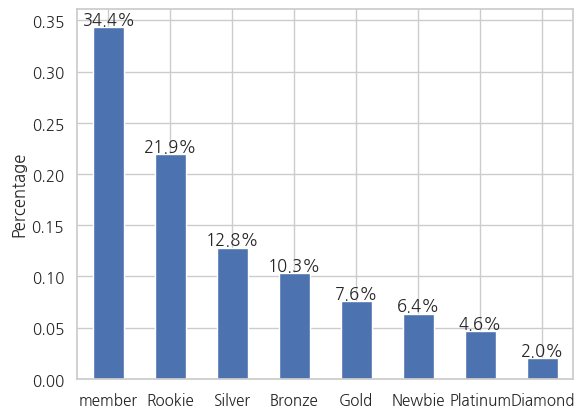

In [ ]:
#고객 등급별 비율 
import matplotlib.pyplot as plt

ax = rank.customer_rank.value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# 각 막대에 대한 비율을 %로 표시
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

## 고객 등급별 매출액 비교

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201035 entries, 0 to 1201034
Data columns (total 26 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   created_at             1201035 non-null  object  
 1   customer_id            1201035 non-null  int64   
 2   booking_id             1201035 non-null  object  
 3   session_id             1201035 non-null  object  
 4   product_id             1201035 non-null  int64   
 5   promo_amount           1201035 non-null  int64   
 6   payment_method         1201035 non-null  category
 7   promo_code             1201035 non-null  category
 8   total_amount           1201035 non-null  int64   
 9   quantity               1201035 non-null  int64   
 10  item_price             1201035 non-null  int64   
 11  payment_status         1201035 non-null  object  
 12  gender                 1201035 non-null  category
 13  birthdate              1201035 non-null  object  
 14  de

## 고객등급별 코호트 리텐션 비교

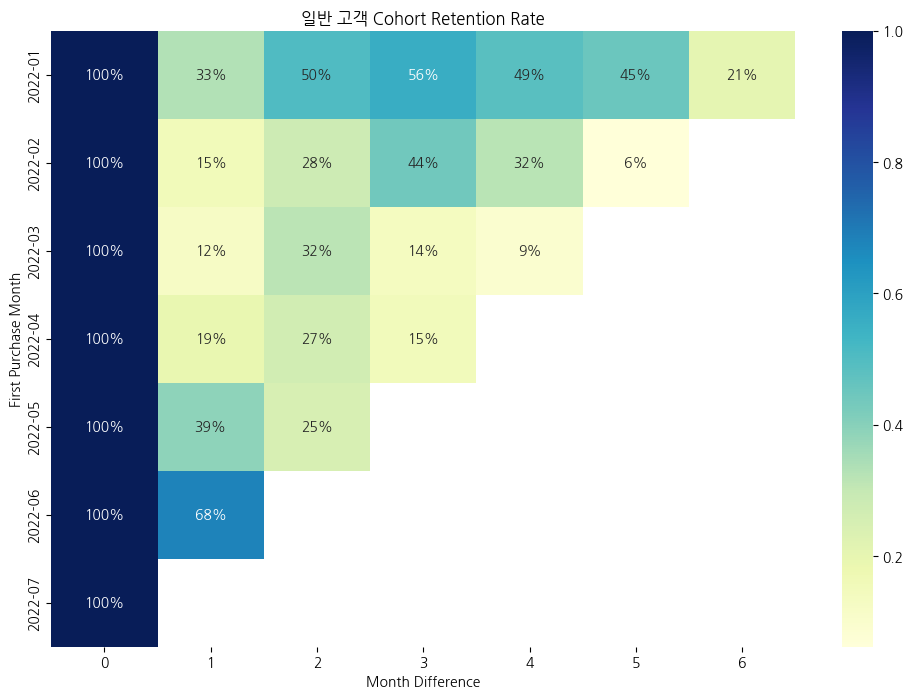

In [ ]:
# 데이터 불러오기
re = df.query('customer_rank == ["member", "Bronze", "Newbie", "Rookie"]') # 일반 고객만 선택
re = re[re.created_at >= '2022-01-01']  # 2022년 2월 이후 데이터만 선택
re = re[['customer_id', 'created_at', 'total_amount']]  # 필요한 열만 선택

# 'created_at' 열을 datetime 객체로 변환
re['created_at'] = pd.to_datetime(re['created_at'])

# 각 구매의 월과 연도 계산
re['purchase_month'] = re['created_at'].dt.to_period('M')

# 각 고객의 첫 구매 월 계산
re['first_purchase_month'] = re.groupby('customer_id')['purchase_month'].transform('min')

# 각 구매와 첫 구매의 월 차이 계산
re['month_diff'] = (re['purchase_month'] - re['first_purchase_month']).apply(lambda x: x.n)

# 각 첫 구매 월과 월 차이에 대한 유일한 고객 수 세기
cohort_data = re.groupby(['first_purchase_month', 'month_diff']).agg(n_customers=('customer_id', 'nunique')).reset_index(drop=False)

# 각 첫 구매 월의 고객 수 계산
cohort_sizes = cohort_data[cohort_data['month_diff'] == 0][['first_purchase_month', 'n_customers']]

# 리텐션 비율 계산
retention = cohort_data.merge(cohort_sizes, on='first_purchase_month')  # 첫 구매 월과 결합
retention['retention_rate'] = retention['n_customers_x'] / retention['n_customers_y']

# 리텐션 비율 pivot table 생성
retention_pivot = retention.pivot_table(index='first_purchase_month', columns='month_diff', values='retention_rate')

# 리텐션 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('일반 고객 Cohort Retention Rate')  # 그래프 제목
plt.xlabel('Month Difference')  # x축 레이블
plt.ylabel('First Purchase Month')  # y축 레이블
plt.show()



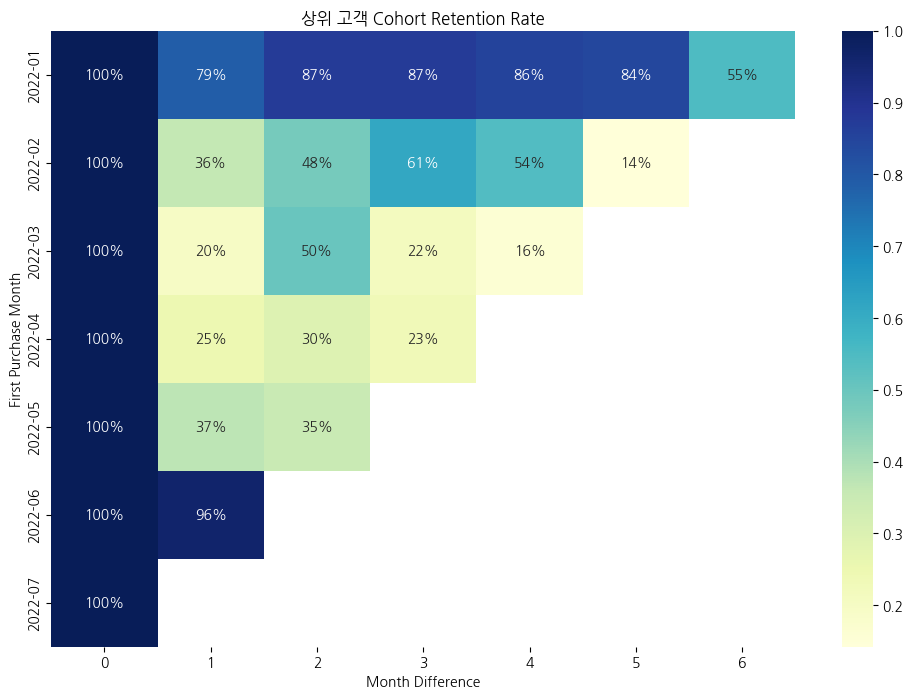

In [ ]:
# 데이터 불러오기
re = df.query('customer_rank == ["Diamond", "Platinum", "Gold", "Silver"]') # 상위 고객만 선택
re = re[re.created_at >= '2022-01-01']  # 2022년 2월 이후 데이터만 선택
re = re[['customer_id', 'created_at', 'total_amount']]  # 필요한 열만 선택

# 'created_at' 열을 datetime 객체로 변환
re['created_at'] = pd.to_datetime(re['created_at'])

# 각 구매의 월과 연도 계산
re['purchase_month'] = re['created_at'].dt.to_period('M')

# 각 고객의 첫 구매 월 계산
re['first_purchase_month'] = re.groupby('customer_id')['purchase_month'].transform('min')

# 각 구매와 첫 구매의 월 차이 계산
re['month_diff'] = (re['purchase_month'] - re['first_purchase_month']).apply(lambda x: x.n)

# 각 첫 구매 월과 월 차이에 대한 유일한 고객 수 세기
cohort_data = re.groupby(['first_purchase_month', 'month_diff']).agg(n_customers=('customer_id', 'nunique')).reset_index(drop=False)

# 각 첫 구매 월의 고객 수 계산
cohort_sizes = cohort_data[cohort_data['month_diff'] == 0][['first_purchase_month', 'n_customers']]

# 리텐션 비율 계산
retention = cohort_data.merge(cohort_sizes, on='first_purchase_month')  # 첫 구매 월과 결합
retention['retention_rate'] = retention['n_customers_x'] / retention['n_customers_y']

# 리텐션 비율 pivot table 생성
retention_pivot = retention.pivot_table(index='first_purchase_month', columns='month_diff', values='retention_rate')

# 리텐션 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('상위 고객 Cohort Retention Rate')  # 그래프 제목
plt.xlabel('Month Difference')  # x축 레이블
plt.ylabel('First Purchase Month')  # y축 레이블
plt.show()



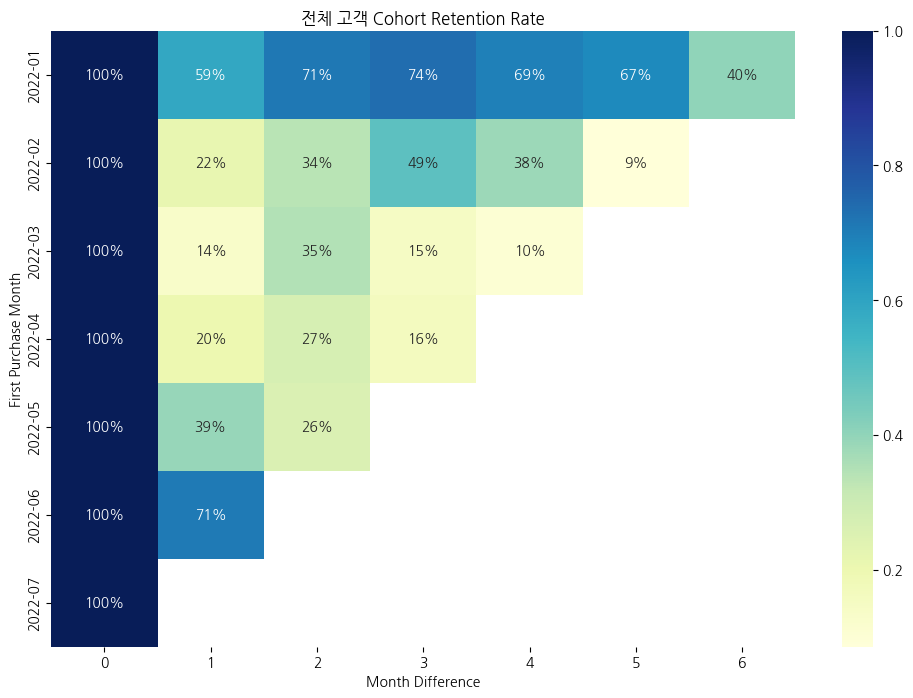

In [ ]:
# 데이터 불러오기
re = df[df.created_at >= '2022-01-01']  # 2022년 2월 이후 데이터만 선택
re = re[['customer_id', 'created_at', 'total_amount']]  # 필요한 열만 선택

# 'created_at' 열을 datetime 객체로 변환
re['created_at'] = pd.to_datetime(re['created_at'])

# 각 구매의 월과 연도 계산
re['purchase_month'] = re['created_at'].dt.to_period('M')

# 각 고객의 첫 구매 월 계산
re['first_purchase_month'] = re.groupby('customer_id')['purchase_month'].transform('min')

# 각 구매와 첫 구매의 월 차이 계산
re['month_diff'] = (re['purchase_month'] - re['first_purchase_month']).apply(lambda x: x.n)

# 각 첫 구매 월과 월 차이에 대한 유일한 고객 수 세기
cohort_data = re.groupby(['first_purchase_month', 'month_diff']).agg(n_customers=('customer_id', 'nunique')).reset_index(drop=False)

# 각 첫 구매 월의 고객 수 계산
cohort_sizes = cohort_data[cohort_data['month_diff'] == 0][['first_purchase_month', 'n_customers']]

# 리텐션 비율 계산
retention = cohort_data.merge(cohort_sizes, on='first_purchase_month')  # 첫 구매 월과 결합
retention['retention_rate'] = retention['n_customers_x'] / retention['n_customers_y']

# 리텐션 비율 pivot table 생성
retention_pivot = retention.pivot_table(index='first_purchase_month', columns='month_diff', values='retention_rate')

# 리텐션 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('전체 고객 Cohort Retention Rate')  # 그래프 제목
plt.xlabel('Month Difference')  # x축 레이블
plt.ylabel('First Purchase Month')  # y축 레이블
plt.show()



## 고객별 구매 패턴 분석

**구매 빈도(frequency)**


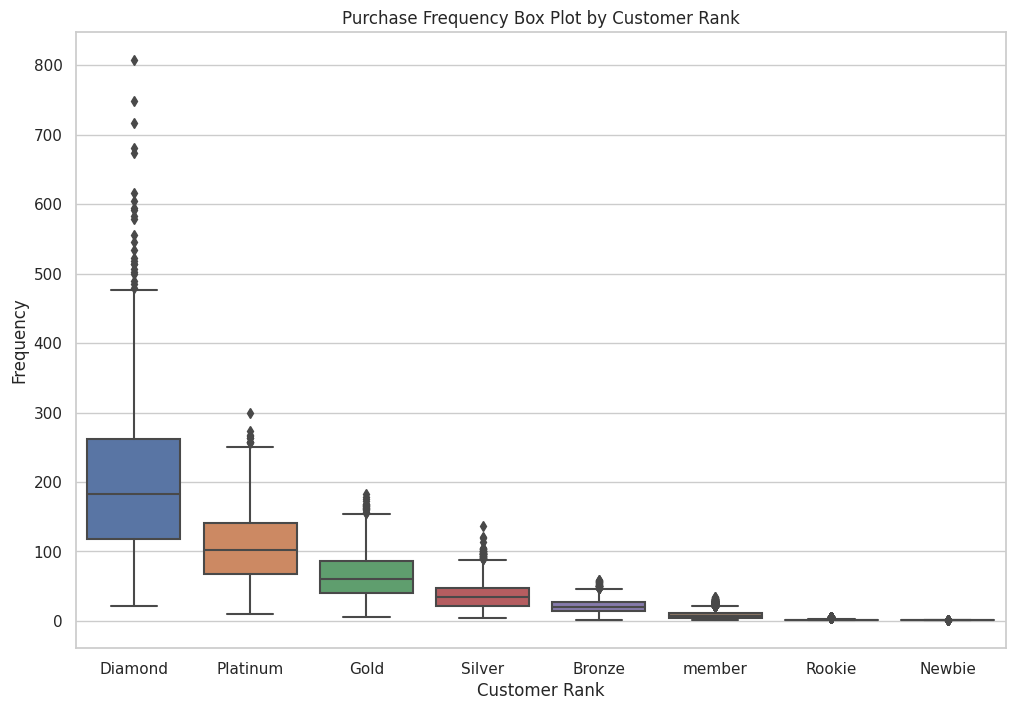

In [ ]:
import pandas as pd
import datetime as dt

data = df[['customer_id', 'created_at', 'total_amount','product_id', 'customer_rank']]

# Recency 계산
data['created_at'] = pd.to_datetime(data['created_at'])
snapshot_date = data['created_at'].max() + dt.timedelta(days=1)

# 고객별 최근 구매일 계산
last_purchase = data.groupby('customer_id')['created_at'].max().reset_index()

# 최근 구매일로부터 경과한 일수 계산
last_purchase['Recency'] = (snapshot_date - last_purchase['created_at']).astype('timedelta64[D]')

# 구매 빈도 계산
frequency_data = data.groupby('customer_id')['product_id'].count().reset_index().rename(columns={'product_id': 'Frequency'})


# Recency 데이터를 원래의 데이터셋에 병합
data = data.merge(last_purchase[['customer_id', 'Recency']], on='customer_id', how='left')
data = data.merge(frequency_data, on='customer_id')

data['Purchase_Cycle'] = data['Recency'] / data['Frequency']

recency_frequency_data_all = data[['customer_id', 'Recency','Frequency','Purchase_Cycle','customer_rank']].drop_duplicates()

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# 고객 등급별 평균 구매 빈도 계산 및 정렬
rank_order = recency_frequency_data_all.groupby('customer_rank')['Frequency'].mean().sort_values(ascending=False).index

# 고객 등급별 구매 빈도 박스 플롯 (정렬된 순서로)
sns.boxplot(data=recency_frequency_data_all, x='customer_rank', y='Frequency', order=rank_order)
plt.title('Purchase Frequency Box Plot by Customer Rank')
plt.xlabel('Customer Rank')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd

# 고객 등급별로 그룹화
grouped_data = recency_frequency_data_all.groupby('customer_rank')['Frequency']

# 평균, 중앙값, 사분위수, 표준편차 계산
mean = grouped_data.mean()
median = grouped_data.median()
quantiles = grouped_data.quantile([0.25, 0.5, 0.75])
std_dev = grouped_data.std()

# 계산된 값을 데이터프레임으로 변환
summary_table = pd.DataFrame({'Mean': mean, 'Median': median, 'Q1': quantiles.loc[:, 0.25], 'Q2': quantiles.loc[:, 0.5], 'Q3': quantiles.loc[:, 0.75], 'Standard Deviation': std_dev})

summary_table = summary_table.reset_index()

#summary_table = summary_table.Mean.sort_values(ascending=False)
# 결과 출력
summary_table = summary_table.sort_values(by='Mean', ascending=False)
summary_table.reset_index(drop=True, inplace=True)
summary_table



,customer_rank,Mean,Median,Q1,Q2,Q3,Standard Deviation
0,Diamond,200.530470,183.0,118.0,183.0,262.0,113.967308
1,Platinum,106.231660,102.0,68.0,102.0,141.0,50.480213
2,Gold,64.476090,61.0,40.0,61.0,86.0,31.518475
3,Silver,36.375369,34.0,22.0,34.0,48.0,17.854673
4,Bronze,21.003854,20.0,14.0,20.0,27.0,9.384796
5,member,8.144686,7.0,4.0,7.0,11.0,5.163693
6,Rookie,1.835966,2.0,1.0,2.0,2.0,0.942399
7,Newbie,1.010642,1.0,1.0,1.0,1.0,0.102624


6월달 고객등급별 구매 빈도

In [ ]:
# 6월 구매한 고객수와 판매된 상품 수 
July =  df[(df['created_at'] >= '2022-06-01') & (df['created_at'] < '2022-07-01')]
July.customer_id.nunique(), July.product_id.count()

(16319, 40263)

In [ ]:
# 7월 구매한 고객수와 판매된 상품 수 
June = df[df.created_at >= '2022-07-01']
June.customer_id.nunique(), June.product_id.count()

(9974, 35305)

In [ ]:
# 6월 대비7월의 고객과 상품의 증감율 
(June.customer_id.nunique()  - July.customer_id.nunique()) /  June.customer_id.nunique() * 100 , (June.product_id.count() - July.product_id.count() )/ June.product_id.count() * 100

(-63.61540004010428, -14.043336637869992)

In [ ]:
July =  df[(df['created_at'] >= '2022-06-01') & (df['created_at'] < '2022-07-01')]
July = July[['customer_id','customer_rank']].drop_duplicates()
July = pd.DataFrame(July.customer_rank.value_counts())
July = July.rename(columns={'customer_rank': 'customer_July'})

June = df[df.created_at >= '2022-07-01']
June = June[['customer_id','customer_rank']].drop_duplicates()
June = pd.DataFrame(June.customer_rank.value_counts())
June = June.rename(columns={'customer_rank': 'customer_June'})

result = pd.merge(June, July, left_index=True, right_index=True, how='outer')

index = ['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze', 'member', 'Rookie','Newbie'] 
col = ['customer_July', 'customer_June']
result = result.loc[index, col]

result['Customer_growth_rate'] = round((result['customer_June']  -  result['customer_July'])  /   result['customer_June']   * 100,1)

result

,customer_July,customer_June,Customer_growth_rate
Diamond,847,585,-44.8
Platinum,1947,1316,-47.9
Gold,2871,1828,-57.1
Silver,3935,2319,-69.7
Bronze,2323,1242,-87.0
member,3773,2117,-78.2
Rookie,554,455,-21.8
Newbie,69,112,38.4


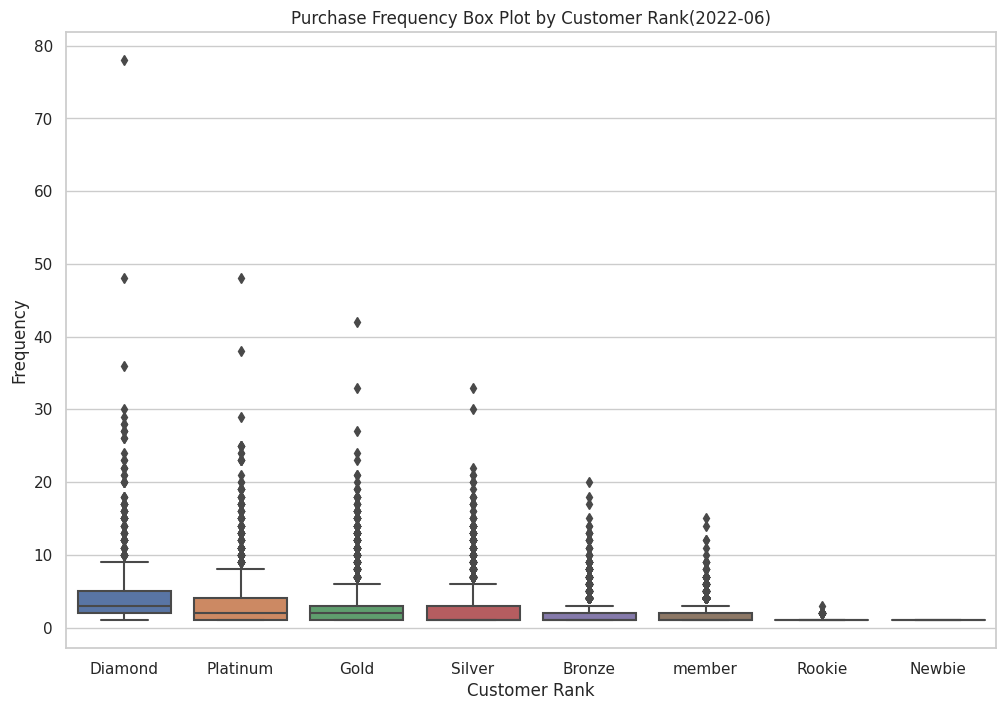

In [ ]:
## 6월달 고객별 구매 빈도
data =  df[(df['created_at'] >= '2022-06-01') & (df['created_at'] < '2022-07-01')]
data = data[['customer_id', 'created_at', 'total_amount','product_id', 'customer_rank']]

# Recency 계산
data['created_at'] = pd.to_datetime(data['created_at'])
snapshot_date = data['created_at'].max() + dt.timedelta(days=1)

# 고객별 최근 구매일 계산
last_purchase = data.groupby('customer_id')['created_at'].max().reset_index()

# 최근 구매일로부터 경과한 일수 계산

last_purchase['Recency'] = (snapshot_date - last_purchase['created_at']).astype('timedelta64[D]')

# 구매 빈도 계산
frequency_data = data.groupby('customer_id')['product_id'].count().reset_index().rename(columns={'product_id': 'Frequency'})


# Recency 데이터를 원래의 데이터셋에 병합
data = data.merge(last_purchase[['customer_id', 'Recency']], on='customer_id', how='left')
data = data.merge(frequency_data, on='customer_id')

data['Purchase_Cycle'] = data['Recency'] / data['Frequency']

recency_frequency_data = data[['customer_id', 'Recency','Frequency','Purchase_Cycle','customer_rank']].drop_duplicates()

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# 고객 등급별 평균 구매 빈도 계산 및 정렬
rank_order = recency_frequency_data.groupby('customer_rank')['Frequency'].mean().sort_values(ascending=False).index

# 고객 등급별 구매 빈도 박스 플롯 (정렬된 순서로)
sns.boxplot(data=recency_frequency_data, x='customer_rank', y='Frequency', order=rank_order)
plt.title('Purchase Frequency Box Plot by Customer Rank(2022-06)')
plt.xlabel('Customer Rank')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd

# 고객 등급별로 그룹화
grouped_data = recency_frequency_data.groupby('customer_rank')['Frequency']

# 평균, 중앙값, 사분위수, 표준편차 계산
mean = grouped_data.mean()
median = grouped_data.median()
quantiles = grouped_data.quantile([0.25, 0.5, 0.75])
std_dev = grouped_data.std()

# 계산된 값을 데이터프레임으로 변환
summary_table = pd.DataFrame({'Mean': mean, 'Median': median, 'Q1': quantiles.loc[:, 0.25], 'Q2': quantiles.loc[:, 0.5], 'Q3': quantiles.loc[:, 0.75], 'Standard Deviation': std_dev})

summary_table = summary_table.reset_index()

#summary_table = summary_table.Mean.sort_values(ascending=False)
# 결과 출력
summary_table = summary_table.sort_values(by='Mean', ascending=False)
summary_table.reset_index(drop=True, inplace=True)
summary_table



,customer_rank,Mean,Median,Q1,Q2,Q3,Standard Deviation
0,Diamond,4.684770,3.0,2.0,3.0,5.0,5.679463
1,Platinum,3.297381,2.0,1.0,2.0,4.0,3.798957
2,Gold,2.880529,2.0,1.0,2.0,3.0,3.235152
3,Silver,2.472173,1.0,1.0,1.0,3.0,2.696224
4,Bronze,2.093414,1.0,1.0,1.0,2.0,1.995767
5,member,1.681686,1.0,1.0,1.0,2.0,1.259187
6,Rookie,1.083032,1.0,1.0,1.0,1.0,0.282652
7,Newbie,1.000000,1.0,1.0,1.0,1.0,0.000000


7월달 고객등급별 구매 빈도

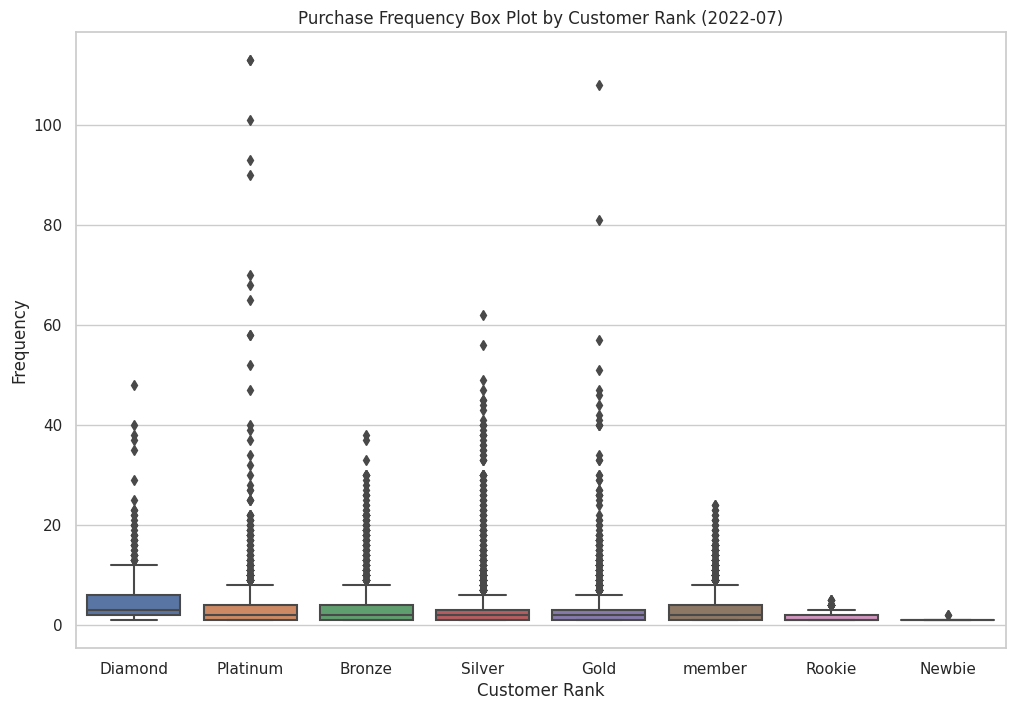

In [ ]:
## 7월달 고객별 구매 빈도
data = df[df.created_at >= '2022-07-01']
data = data[['customer_id', 'created_at', 'total_amount','product_id', 'customer_rank']]

# Recency 계산
data['created_at'] = pd.to_datetime(data['created_at'])
snapshot_date = data['created_at'].max() + dt.timedelta(days=1)

# 고객별 최근 구매일 계산
last_purchase = data.groupby('customer_id')['created_at'].max().reset_index()

# 최근 구매일로부터 경과한 일수 계산
last_purchase['Recency'] = (snapshot_date - last_purchase['created_at']).astype('timedelta64[D]')

# 구매 빈도 계산
frequency_data = data.groupby('customer_id')['product_id'].count().reset_index().rename(columns={'product_id': 'Frequency'})


# Recency 데이터를 원래의 데이터셋에 병합
data = data.merge(last_purchase[['customer_id', 'Recency']], on='customer_id', how='left')
data = data.merge(frequency_data, on='customer_id')

data['Purchase_Cycle'] = data['Recency'] / data['Frequency']

recency_frequency_data = data[['customer_id', 'Recency','Frequency','Purchase_Cycle','customer_rank']].drop_duplicates()

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# 고객 등급별 평균 구매 빈도 계산 및 정렬
rank_order = recency_frequency_data.groupby('customer_rank')['Frequency'].mean().sort_values(ascending=False).index

# 고객 등급별 구매 빈도 박스 플롯 (정렬된 순서로)
sns.boxplot(data=recency_frequency_data, x='customer_rank', y='Frequency', order=rank_order)
plt.title('Purchase Frequency Box Plot by Customer Rank (2022-07)')
plt.xlabel('Customer Rank')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd

# 고객 등급별로 그룹화
grouped_data = recency_frequency_data.groupby('customer_rank')['Frequency']

# 평균, 중앙값, 사분위수, 표준편차 계산
mean = grouped_data.mean()
median = grouped_data.median()
quantiles = grouped_data.quantile([0.25, 0.5, 0.75])
std_dev = grouped_data.std()

# 계산된 값을 데이터프레임으로 변환
summary_table = pd.DataFrame({'Mean': mean, 'Median': median, 'Q1': quantiles.loc[:, 0.25], 'Q2': quantiles.loc[:, 0.5], 'Q3': quantiles.loc[:, 0.75], 'Standard Deviation': std_dev})

summary_table = summary_table.reset_index()

#summary_table = summary_table.Mean.sort_values(ascending=False)
# 결과 출력
summary_table = summary_table.sort_values(by='Mean', ascending=False)
summary_table.reset_index(drop=True, inplace=True)
summary_table



,customer_rank,Mean,Median,Q1,Q2,Q3,Standard Deviation
0,Diamond,4.823932,3.0,2.0,3.0,6.0,5.387528
1,Platinum,4.353343,2.0,1.0,2.0,4.0,8.592892
2,Bronze,3.667472,2.0,1.0,2.0,4.0,5.138192
3,Silver,3.557999,2.0,1.0,2.0,3.0,5.820509
4,Gold,3.456236,2.0,1.0,2.0,3.0,5.866770
5,member,3.198394,2.0,1.0,2.0,4.0,3.481159
6,Rookie,1.637363,1.0,1.0,1.0,2.0,0.911460
7,Newbie,1.017857,1.0,1.0,1.0,1.0,0.133027


**구매 주기(Purchase_Cycle)**

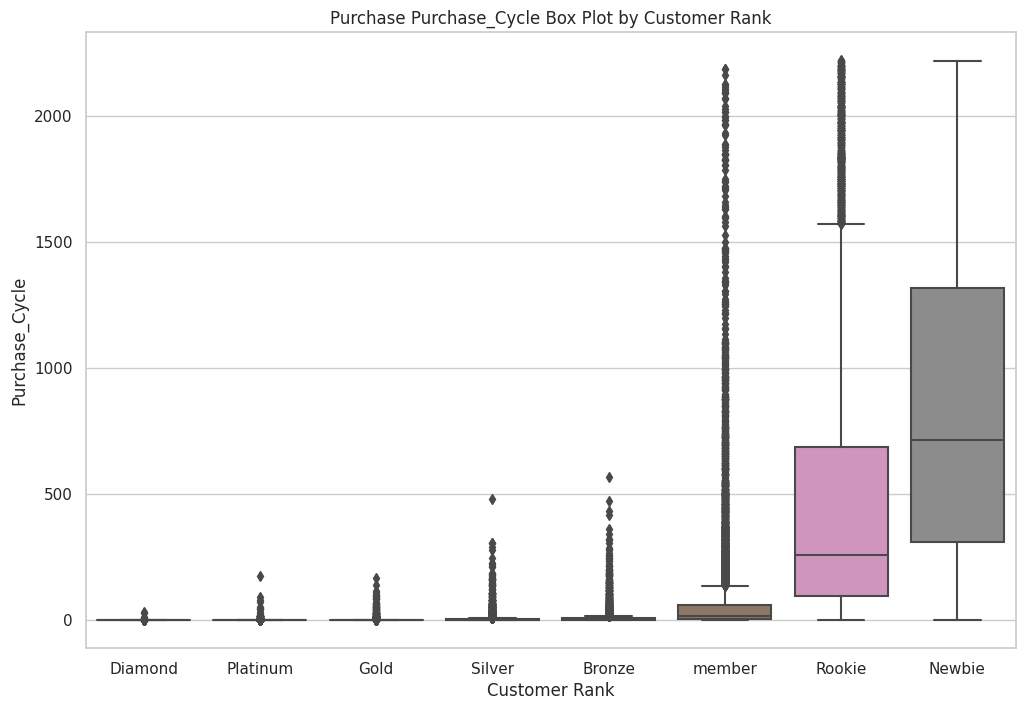

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# 고객 등급별 평균 구매 빈도 계산 및 정렬
rank_order = recency_frequency_data_all.groupby('customer_rank')['Purchase_Cycle'].mean().sort_values(ascending=True).index

# 고객 등급별 구매 빈도 박스 플롯 (정렬된 순서로)
sns.boxplot(data=recency_frequency_data_all, x='customer_rank', y='Purchase_Cycle', order=rank_order)
plt.title('Purchase Purchase_Cycle Box Plot by Customer Rank')
plt.xlabel('Customer Rank')
plt.ylabel('Purchase_Cycle')
plt.show()


In [ ]:
import pandas as pd

# 고객 등급별로 그룹화
grouped_data = recency_frequency_data_all.groupby('customer_rank')['Purchase_Cycle']

# 평균, 중앙값, 사분위수, 표준편차 계산
mean = grouped_data.mean()
median = grouped_data.median()
quantiles = grouped_data.quantile([0.25, 0.5, 0.75])
std_dev = grouped_data.std()

# 계산된 값을 데이터프레임으로 변환
summary_table = pd.DataFrame({'Mean': mean, 'Median': median, 'Q1': quantiles.loc[:, 0.25], 'Q2': quantiles.loc[:, 0.5], 'Q3': quantiles.loc[:, 0.75], 'Standard Deviation': std_dev})

summary_table = summary_table.reset_index()

#summary_table = summary_table.Mean.sort_values(ascending=False)
# 결과 출력
summary_table = summary_table.sort_values(by='Mean', ascending=True)
summary_table.reset_index(drop=True, inplace=True)
summary_table



,customer_rank,Mean,Median,Q1,Q2,Q3,Standard Deviation
0,Diamond,0.376403,0.143519,0.032653,0.143519,0.296703,1.530397
1,Platinum,0.976639,0.267516,0.087168,0.267516,0.500000,5.402370
2,Gold,2.079267,0.487652,0.212963,0.487652,1.162990,7.939960
3,Silver,5.411024,1.153846,0.526316,1.153846,3.200000,18.406088
4,Bronze,11.202584,3.000000,1.272727,3.000000,7.647059,30.512477
5,member,71.927232,18.363636,6.250000,18.363636,58.800000,175.785293
6,Rookie,487.092969,260.000000,95.500000,260.000000,686.250000,545.998798
7,Newbie,845.017214,714.000000,309.000000,714.000000,1319.500000,623.639951


## 카테고리별 매출 분석

### 고객별 선호 카테고리 분석

고객 순위 및 상품 유형별 6월 총 구매 금액(천원 단위)

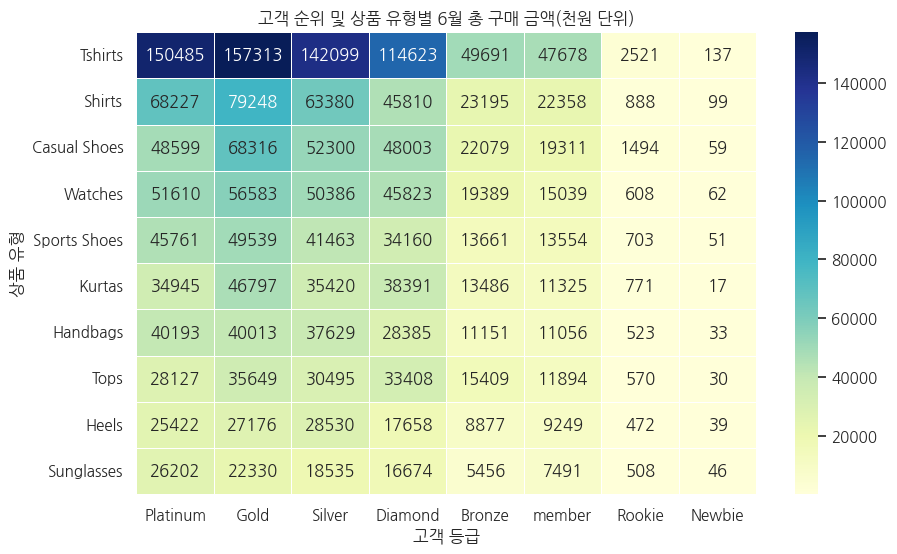

In [ ]:
ca = df[(df.created_at >= '2022-06-01') & (df.created_at < '2022-07-01')] # 6월 한정 매출액
# 데이터프레임 `ca`를 `customer_id`와 `articleType`로 그룹화하고, 각 그룹에서 `product_id`의 수를 세어 `articleType_count`를 생성합니다.
articleType_count = ca.groupby(['customer_id', 'articleType'])['product_id'].count().reset_index()

# `product_id` 열 이름을 `articleType_count`로 바꿉니다.
articleType_count = articleType_count.rename(columns={'product_id': 'articleType_count'})

# 데이터프레임 `ca`를 `customer_id`와 `articleType`로 그룹화하고, 각 그룹에서 `total_amount`를 합산한 `articleType_total_amount`를 생성합니다.
articleType_total_amount = ca.groupby(['customer_id', 'articleType'])['total_amount'].sum().reset_index()

# `articleType_count`와 `articleType_total_amount` 데이터프레임을 `customer_id`와 `articleType` 열을 기준으로 병합합니다.
articleType_count = pd.merge(articleType_count, articleType_total_amount, on=['customer_id', 'articleType'])

# `ca`에서 `customer_id`, `customer_rank`, `articleType` 열만 추출하여 데이터프레임을 만들고, 이를 `articleType_count`와 `customer_id`, `articleType` 열을 기준으로 병합합니다.
articleType_count = pd.merge(articleType_count, ca[['customer_id', 'customer_rank', 'articleType']], on=['customer_id', 'articleType'])

# `articleType_count`에서 중복된 행을 제거합니다.
articleType_count = articleType_count.drop_duplicates()

# `articleType_count`를 `customer_rank`와 `articleType`로 그룹화하고, 각 그룹에서 `articleType_count`와 `total_amount` 열을 합산한 `ca_grouped`를 생성합니다.
ca_grouped = articleType_count.groupby(['customer_rank', 'articleType'])[['articleType_count', 'total_amount']].sum().reset_index()


# articleType 별로 articleType_total_amount 합계 계산
articleType_total_amount = ca_grouped.groupby('articleType')['total_amount'].sum().reset_index()

# customer_rank 별로 customer_rank 합계 계산
customer_rank_total_amount = ca_grouped.groupby('customer_rank')['total_amount'].sum().reset_index()

# 내림차순 정렬
sorted_customer_ranks = ['Platinum', 'Gold', 'Silver', 'Diamond','Bronze', 'member', 'Rookie','Newbie'] 

# 내림차순 정렬
sorted_master_categories = articleType_total_amount.sort_values('total_amount', ascending=False)['articleType'].tolist()[:10]

# 피벗 테이블 생성
pivot_ca_june  = ca_grouped.pivot(index='articleType', columns='customer_rank', values='total_amount')

# 고객 등급 순서를 정렬된 순서로 변경
pivot_ca_june  = pivot_ca_june [sorted_customer_ranks]

# articleType 순서를 정렬된 순서로 변경
pivot_ca_june  = pivot_ca_june .reindex(sorted_master_categories)

# 숫자를 천 단위로 변환
pivot_ca_june  = round(pivot_ca_june  / 1000)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_ca_june , annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.xlabel("고객 등급")
plt.ylabel("상품 유형")
plt.title("고객 순위 및 상품 유형별 6월 총 구매 금액(천원 단위)")
plt.show()


고객 순위 및 상품 유형별 7월 총 구매 금액(천원 단위)

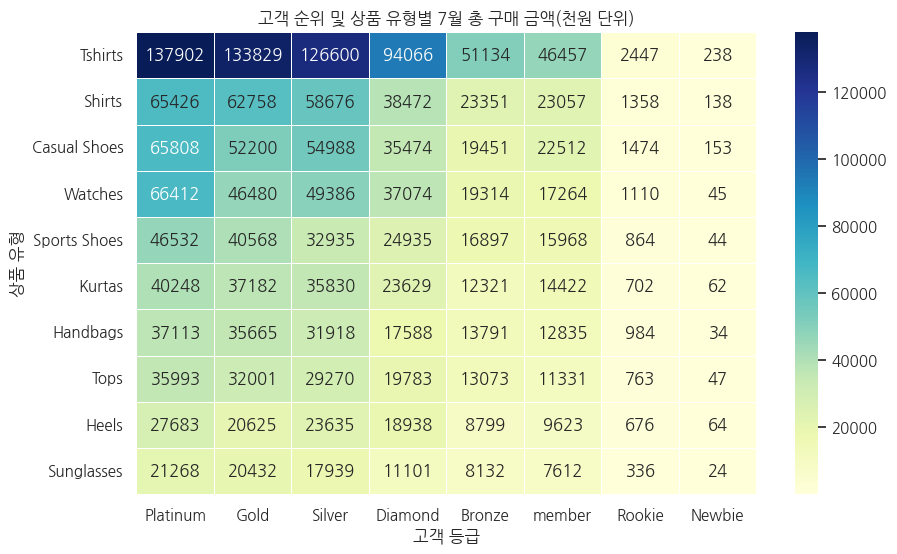

In [ ]:
ca = df[df.created_at >= '2022-07-01'] # 7월 한정 매출액
# 데이터프레임 `ca`를 `customer_id`와 `articleType`로 그룹화하고, 각 그룹에서 `product_id`의 수를 세어 `articleType_count`를 생성합니다.
articleType_count = ca.groupby(['customer_id', 'articleType'])['product_id'].count().reset_index()

# `product_id` 열 이름을 `articleType_count`로 바꿉니다.
articleType_count = articleType_count.rename(columns={'product_id': 'articleType_count'})

# 데이터프레임 `ca`를 `customer_id`와 `articleType`로 그룹화하고, 각 그룹에서 `total_amount`를 합산한 `articleType_total_amount`를 생성합니다.
articleType_total_amount = ca.groupby(['customer_id', 'articleType'])['total_amount'].sum().reset_index()

# `articleType_count`와 `articleType_total_amount` 데이터프레임을 `customer_id`와 `articleType` 열을 기준으로 병합합니다.
articleType_count = pd.merge(articleType_count, articleType_total_amount, on=['customer_id', 'articleType'])

# `ca`에서 `customer_id`, `customer_rank`, `articleType` 열만 추출하여 데이터프레임을 만들고, 이를 `articleType_count`와 `customer_id`, `articleType` 열을 기준으로 병합합니다.
articleType_count = pd.merge(articleType_count, ca[['customer_id', 'customer_rank', 'articleType']], on=['customer_id', 'articleType'])

# `articleType_count`에서 중복된 행을 제거합니다.
articleType_count = articleType_count.drop_duplicates()

# `articleType_count`를 `customer_rank`와 `articleType`로 그룹화하고, 각 그룹에서 `articleType_count`와 `total_amount` 열을 합산한 `ca_grouped`를 생성합니다.
ca_grouped = articleType_count.groupby(['customer_rank', 'articleType'])[['articleType_count', 'total_amount']].sum().reset_index()


# articleType 별로 articleType_total_amount 합계 계산
articleType_total_amount = ca_grouped.groupby('articleType')['total_amount'].sum().reset_index()

# customer_rank 별로 customer_rank 합계 계산
customer_rank_total_amount = ca_grouped.groupby('customer_rank')['total_amount'].sum().reset_index()

# 내림차순 정렬
sorted_customer_ranks = customer_rank_total_amount.sort_values('total_amount', ascending=False)['customer_rank'].tolist()

# 내림차순 정렬
sorted_master_categories = articleType_total_amount.sort_values('total_amount', ascending=False)['articleType'].tolist()[:10]

# 피벗 테이블 생성
pivot_ca_july  = ca_grouped.pivot(index='articleType', columns='customer_rank', values='total_amount')

# 고객 등급 순서를 정렬된 순서로 변경
pivot_ca_july  = pivot_ca_july [sorted_customer_ranks]

# articleType 순서를 정렬된 순서로 변경
pivot_ca_july  = pivot_ca_july .reindex(sorted_master_categories)

# 숫자를 천 단위로 변환
pivot_ca_july  = round(pivot_ca_july  / 1000)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_ca_july , annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.xlabel("고객 등급")
plt.ylabel("상품 유형")
plt.title("고객 순위 및 상품 유형별 7월 총 구매 금액(천원 단위)")
plt.show()


6월 대비 7월 매출액 증감율(%)

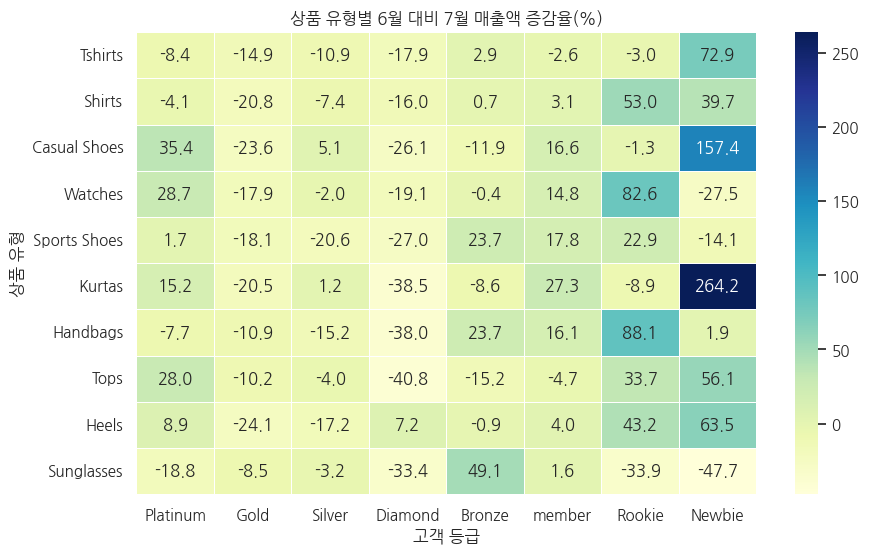

In [ ]:
# 6월 매출액
ca_june = df[(df.created_at >= '2022-06-01') & (df.created_at < '2022-07-01')] 
# 7월 매출액
ca_july = df[df.created_at >= '2022-07-01']

# 6월 매출액 피벗
pivot_ca_june = ca_june.pivot_table(index='articleType', columns='customer_rank', values='total_amount', aggfunc='sum')
# 7월 매출액 피벗
pivot_ca_july = ca_july.pivot_table(index='articleType', columns='customer_rank', values='total_amount', aggfunc='sum')

# 고객 등급 순서를 6월 매출액의 순서로 변경
pivot_ca_july = pivot_ca_july.reindex(index=pivot_ca_june.index, columns=pivot_ca_june.columns)

# 증감율 계산
pct_change = (pivot_ca_july - pivot_ca_june) / pivot_ca_june * 100

#행과 열 변경 
articleType =  ['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes','Kurtas', 'Handbags', 'Tops', 'Heels', 'Sunglasses']
customer_rank =  ['Platinum', 'Gold', 'Silver', 'Diamond','Bronze', 'member', 'Rookie','Newbie'] 
pct_change = (pivot_ca_july.loc[articleType, customer_rank] - pivot_ca_june.loc[articleType, customer_rank]) / pivot_ca_june.loc[articleType, customer_rank] * 100

# 증감율 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(pct_change, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)

plt.xlabel("고객 등급")
plt.ylabel("상품 유형")
plt.title("상품 유형별 6월 대비 7월 매출액 증감율(%)")
plt.show()


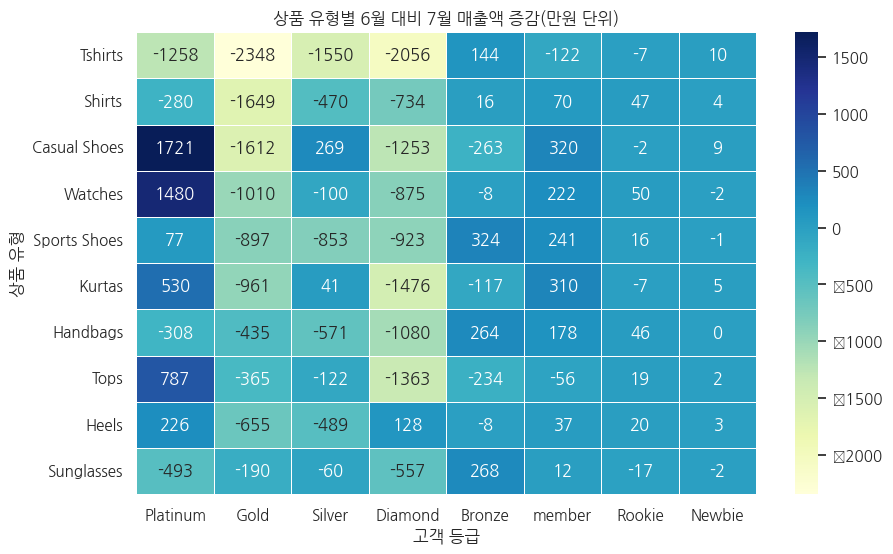

In [ ]:
# 6월 매출액
ca_june = df[(df.created_at >= '2022-06-01') & (df.created_at < '2022-07-01')] 
# 7월 매출액
ca_july = df[df.created_at >= '2022-07-01']

# 6월 매출액 피벗
pivot_ca_june = ca_june.pivot_table(index='articleType', columns='customer_rank', values='total_amount', aggfunc='sum')
# 7월 매출액 피벗
pivot_ca_july = ca_july.pivot_table(index='articleType', columns='customer_rank', values='total_amount', aggfunc='sum')

# 고객 등급 순서를 6월 매출액의 순서로 변경
pivot_ca_july = pivot_ca_july.reindex(index=pivot_ca_june.index, columns=pivot_ca_june.columns)

# 증감율 계산
pct_change = (pivot_ca_july - pivot_ca_june) / pivot_ca_june * 100

#행과 열 변경 
articleType =  ['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes','Kurtas', 'Handbags', 'Tops', 'Heels', 'Sunglasses']
customer_rank =  ['Platinum', 'Gold', 'Silver', 'Diamond','Bronze', 'member', 'Rookie','Newbie'] 
pct_change = round((pivot_ca_july.loc[articleType, customer_rank] - pivot_ca_june.loc[articleType, customer_rank]) / 10000)
# 증감율 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(pct_change, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.xlabel("고객 등급")
plt.ylabel("상품 유형")
plt.title("상품 유형별 6월 대비 7월 매출액 증감(만원 단위)")
plt.show()


고객 등급 및 서브 카테고리별 6월 총 구매 금액(천원 단위)

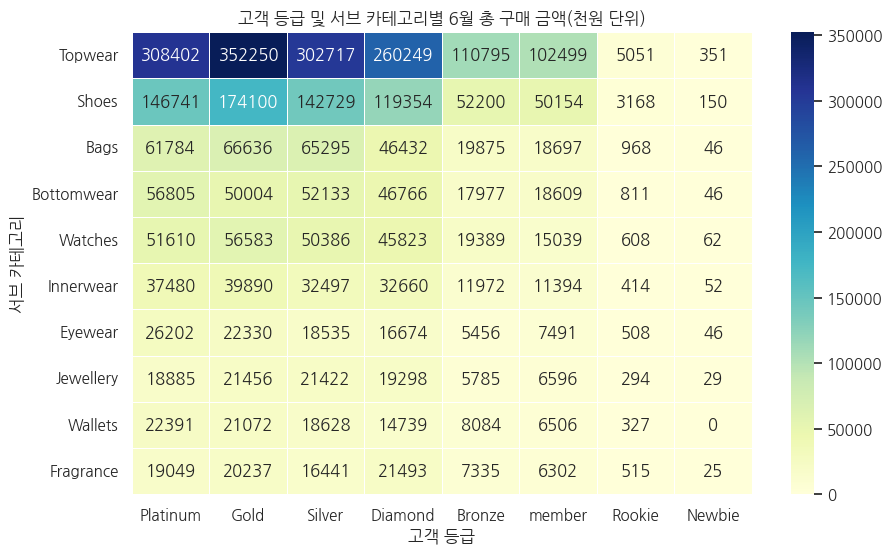

In [ ]:
ca = df[(df.created_at >= '2022-06-01') & (df.created_at < '2022-07-01')] # 6월 한정 매출액
subCategory_count = ca.groupby(['customer_id', 'subCategory'])['product_id'].count().reset_index()
subCategory_count = subCategory_count.rename(columns={'product_id': 'subCategory_count'})

subCategory_total_amount = ca.groupby(['customer_id', 'subCategory'])['total_amount'].sum().reset_index()
subCategory_count = pd.merge(subCategory_count,subCategory_total_amount, on = ['customer_id','subCategory'])
subCategory_count = pd.merge(subCategory_count,ca[['customer_id','customer_rank','subCategory']],on= ['customer_id','subCategory'])

subCategory_count = subCategory_count.drop_duplicates()

ca_grouped = subCategory_count.groupby(['customer_rank', 'subCategory'])[['subCategory_count', 'total_amount']].sum().reset_index()

# subCategory 별로 subCategory_total_amount 합계 계산
subCategory_total_amount = ca_grouped.groupby('subCategory')['total_amount'].sum().reset_index()

# customer_rank 별로 customer_rank 합계 계산
customer_rank_total_amount = ca_grouped.groupby('customer_rank')['total_amount'].sum().reset_index()

# 내림차순 정렬
sorted_customer_ranks = ['Platinum', 'Gold', 'Silver', 'Diamond','Bronze', 'member', 'Rookie','Newbie'] 

# 내림차순 정렬
sorted_master_categories = subCategory_total_amount.sort_values('total_amount', ascending=False)['subCategory'].tolist()[:10]

# 피벗 테이블 생성
pivot_ca = ca_grouped.pivot(index='subCategory', columns='customer_rank', values='total_amount')

# 고객 등급 순서를 정렬된 순서로 변경
pivot_ca = pivot_ca[sorted_customer_ranks]

# subCategory 순서를 정렬된 순서로 변경
pivot_ca = pivot_ca.reindex(sorted_master_categories)

# 숫자를 천 단위로 변환
pivot_ca = round(pivot_ca / 1000)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_ca, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.xlabel("고객 등급")
plt.ylabel("서브 카테고리")
plt.title("고객 등급 및 서브 카테고리별 6월 총 구매 금액(천원 단위)")
plt.show()



고객 등급 및 서브 카테고리별 7월 총 구매 금액(천원 단위)

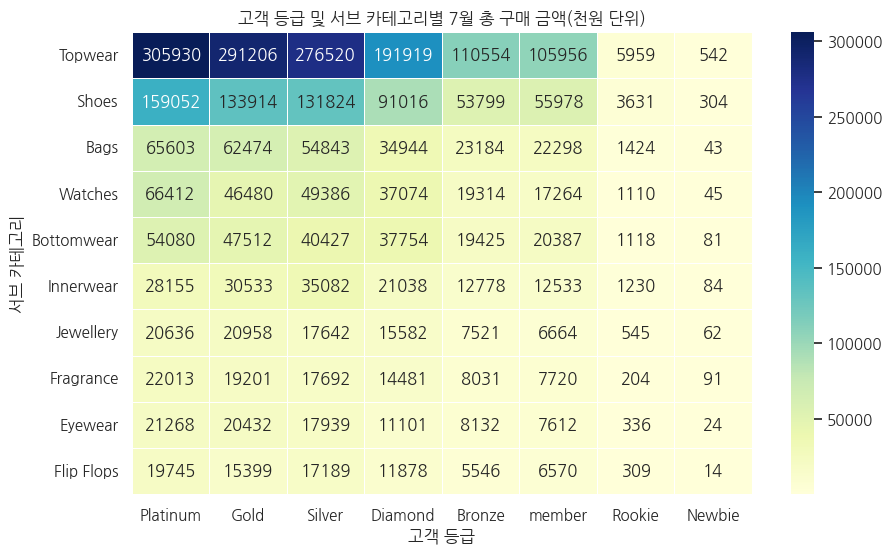

In [ ]:
ca = df[df.created_at >= '2022-07-01'] # 7월 한정 매출액
subCategory_count = ca.groupby(['customer_id', 'subCategory'])['product_id'].count().reset_index()
subCategory_count = subCategory_count.rename(columns={'product_id': 'subCategory_count'})

subCategory_total_amount = ca.groupby(['customer_id', 'subCategory'])['total_amount'].sum().reset_index()
subCategory_count = pd.merge(subCategory_count,subCategory_total_amount, on = ['customer_id','subCategory'])
subCategory_count = pd.merge(subCategory_count,ca[['customer_id','customer_rank','subCategory']],on= ['customer_id','subCategory'])

subCategory_count = subCategory_count.drop_duplicates()

ca_grouped = subCategory_count.groupby(['customer_rank', 'subCategory'])[['subCategory_count', 'total_amount']].sum().reset_index()

# subCategory 별로 subCategory_total_amount 합계 계산
subCategory_total_amount = ca_grouped.groupby('subCategory')['total_amount'].sum().reset_index()

# customer_rank 별로 customer_rank 합계 계산
customer_rank_total_amount = ca_grouped.groupby('customer_rank')['total_amount'].sum().reset_index()

# 내림차순 정렬
sorted_customer_ranks = customer_rank_total_amount.sort_values('total_amount', ascending=False)['customer_rank'].tolist()

# 내림차순 정렬
sorted_master_categories = subCategory_total_amount.sort_values('total_amount', ascending=False)['subCategory'].tolist()[:10]

# 피벗 테이블 생성
pivot_ca = ca_grouped.pivot(index='subCategory', columns='customer_rank', values='total_amount')

# 고객 등급 순서를 정렬된 순서로 변경
pivot_ca = pivot_ca[sorted_customer_ranks]

# subCategory 순서를 정렬된 순서로 변경
pivot_ca = pivot_ca.reindex(sorted_master_categories)

# 숫자를 천 단위로 변환
pivot_ca = round(pivot_ca / 1000)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_ca, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.xlabel("고객 등급")
plt.ylabel("서브 카테고리")
plt.title("고객 등급 및 서브 카테고리별 7월 총 구매 금액(천원 단위)")
plt.show()



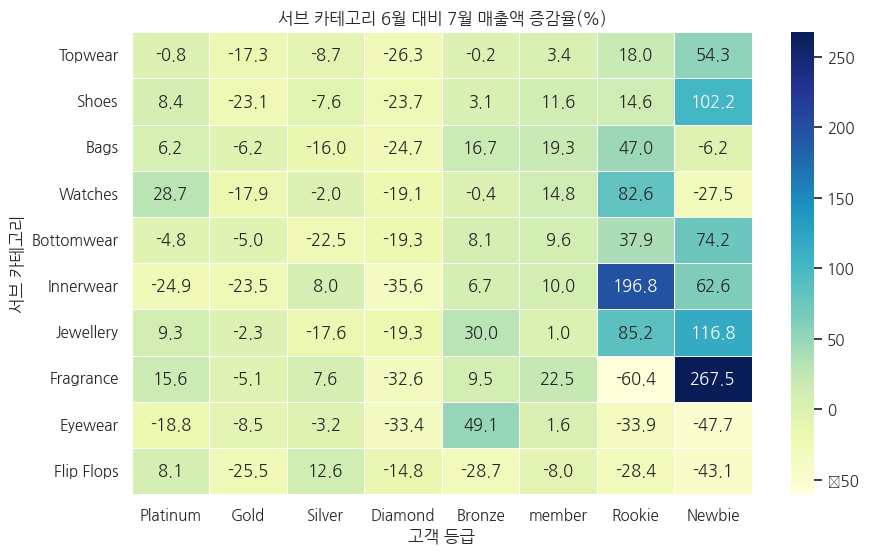

In [ ]:
# 6월 매출액
ca_june = df[(df.created_at >= '2022-06-01') & (df.created_at < '2022-07-01')] 
# 7월 매출액
ca_july = df[df.created_at >= '2022-07-01']

# 6월 매출액 피벗
pivot_ca_june = ca_june.pivot_table(index='subCategory', columns='customer_rank', values='total_amount', aggfunc='sum')
# 7월 매출액 피벗
pivot_ca_july = ca_july.pivot_table(index='subCategory', columns='customer_rank', values='total_amount', aggfunc='sum')

# 고객 등급 순서를 6월 매출액의 순서로 변경
pivot_ca_july = pivot_ca_july.reindex(index=pivot_ca_june.index, columns=pivot_ca_june.columns)


#행과 열 변경 
subCategory =  ['Topwear', 'Shoes', 'Bags', 'Watches', 'Bottomwear', 'Innerwear','Jewellery', 'Fragrance', 'Eyewear', 'Flip Flops']
customer_rank =  ['Platinum', 'Gold', 'Silver', 'Diamond','Bronze', 'member', 'Rookie','Newbie'] 
pct_change = (pivot_ca_july.loc[subCategory, customer_rank] - pivot_ca_june.loc[subCategory, customer_rank]) / pivot_ca_june.loc[subCategory, customer_rank] * 100

# 증감율 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(pct_change, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)

plt.xlabel("고객 등급")
plt.ylabel("서브 카테고리")
plt.title("서브 카테고리 6월 대비 7월 매출액 증감율(%)")
plt.show()


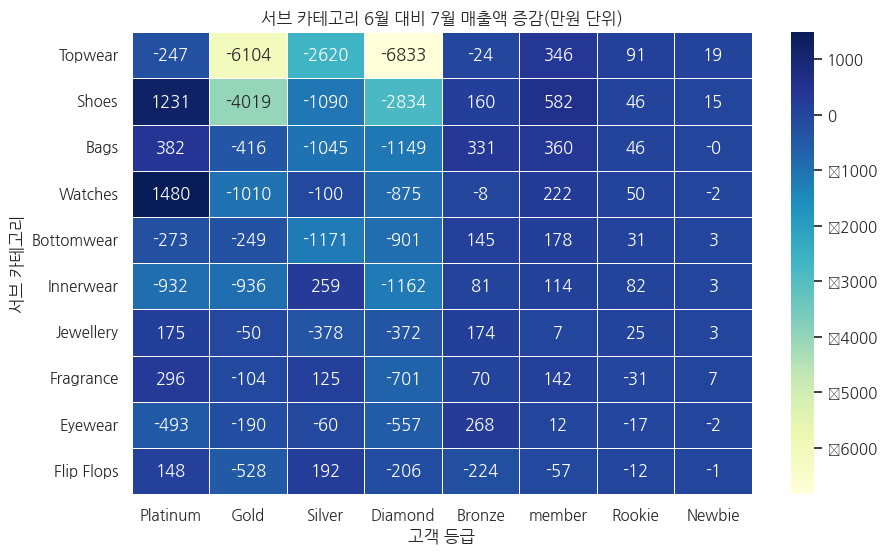

In [ ]:
# 6월 매출액
ca_june = df[(df.created_at >= '2022-06-01') & (df.created_at < '2022-07-01')] 
# 7월 매출액
ca_july = df[df.created_at >= '2022-07-01']

# 6월 매출액 피벗
pivot_ca_june = ca_june.pivot_table(index='subCategory', columns='customer_rank', values='total_amount', aggfunc='sum')
# 7월 매출액 피벗
pivot_ca_july = ca_july.pivot_table(index='subCategory', columns='customer_rank', values='total_amount', aggfunc='sum')

# 고객 등급 순서를 6월 매출액의 순서로 변경
pivot_ca_july = pivot_ca_july.reindex(index=pivot_ca_june.index, columns=pivot_ca_june.columns)


#행과 열 변경 
subCategory =  ['Topwear', 'Shoes', 'Bags', 'Watches', 'Bottomwear', 'Innerwear','Jewellery', 'Fragrance', 'Eyewear', 'Flip Flops']
customer_rank =  ['Platinum', 'Gold', 'Silver', 'Diamond','Bronze', 'member', 'Rookie','Newbie'] 
pct_change = round((pivot_ca_july.loc[subCategory, customer_rank] - pivot_ca_june.loc[subCategory, customer_rank]) /10000)

# 증감율 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(pct_change, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.xlabel("고객 등급")
plt.ylabel("서브 카테고리")
plt.title("서브 카테고리 6월 대비 7월 매출액 증감(만원 단위)")
plt.show()


## 데이터 내보내기

In [ ]:
before.to_csv('/content/drive/MyDrive/colab_data/Fashion Campus/before.csv', index=False)
after.to_csv('/content/drive/MyDrive/colab_data/Fashion Campus/after.csv', index=False)
df.to_csv('/content/drive/MyDrive/colab_data/Fashion Campus/fashion_campus.csv', index=False)